# Debugging Python Code
<hr style="border:2px solid black">

- A *bug* is an error, flaw or fault in computer code
- Buggy code behaves in an unintended way, giving incorrect or unexpected results
- *Debugging* is the process of finding and fixing bugs 


<img src="grace_hopper.png" width="500"/>

<hr style="border:2px solid black">

## 1. Bug Types

- **Syntax Error**
- **Runtime Error**
- **Semantic Error**

### 1.1 Syntax Error

- Python interpreter does not understand some instruction(s) while parsing code
- "grammatically incorrect" code
- compile-time error, detected by the compiler before the code is ever executed

**Example**

In [1]:
drinks = ["coffee", "tea", "water", "juice", "oatmilk", lemonade"]
numbers = [2, 3, 0]

for drink in drinks:
print drink

SyntaxError: unterminated string literal (detected at line 1) (1629942267.py, line 1)

In [2]:
# fix syntax error
drinks = ["coffee", "tea", "water", "juice", "oatmilk", "lemonade"]
numbers = [2, 3, 0]

for drink in drinks:
print drink

IndentationError: expected an indented block after 'for' statement on line 5 (4203812205.py, line 6)

In [3]:
# fix indentation error
drinks = ["coffee", "tea", "water", "juice", "oatmilk", "lemonade"]
numbers = [2, 3, 0]

for drink in drinks:
    print drink

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1996802525.py, line 6)

In [4]:
# fix syntax error
drinks = ["coffee", "tea", "water", "juice", "oatmilk", "lemonade"]
numbers = [2, 3, 0]

for drink in drinks:
    print(drink)

coffee
tea
water
juice
oatmilk
lemonade


### 1.2 Runtime Error

- Python understands the instructions, but runs into trouble when executing them
- "gramatically correct" code that may not always make sense
- detected during or after the execution of the code

**Example**

In [5]:
def division(a,b):
    return a/b

In [6]:
division(5,2)

2.5

In [7]:
division(5,0)

ZeroDivisionError: division by zero

### 1.3 Semantic Error

- Python can understand and execute the instructions, but produces unintended results
- "gramatically correct" and "meaningful" code having logical loopholes
- logical error; does not get detected; code runs without crashing

**Example**

In [8]:
my_sentence = "Hello there, how is it going?"

results = []
for word in my_sentence: 
    w_lower = word.lower()
    results.append(w_lower)
    
results

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ',',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 'i',
 's',
 ' ',
 'i',
 't',
 ' ',
 'g',
 'o',
 'i',
 'n',
 'g',
 '?']

In [9]:
word_list = [word.lower() for word in my_sentence.split(" ")]
word_list

['hello', 'there,', 'how', 'is', 'it', 'going?']

In [10]:
word_list = [("").join([char for char in word if char.isalpha()]) for word in word_list]
word_list

['hello', 'there', 'how', 'is', 'it', 'going']

<hr style="border:2px solid black">

## 2. Exceptions in Python

- `TypeError`: operation or function is applied to an object of inappropriate type

In [11]:
sum('hello')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

- `NameError`: variable name does not exist

In [12]:
my_variable

NameError: name 'my_variable' is not defined

- `ValueError`: function receives an argument of right type but with inappropriate value

ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)

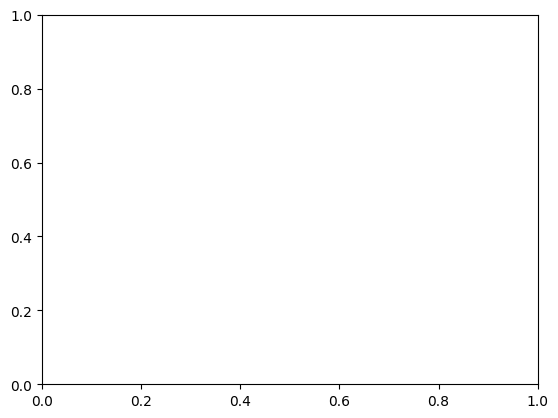

In [13]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3, 4]
plt.plot(x, y)

- `IndexError`: index is too large, or too small

In [ ]:
my_list = [1, 2, 3]
my_list[-4]

- `KeyError`: accessing any dictionary key or dataframe column does not exist

In [14]:
my_dictionary = {
    'x': [1,2],
    'y': [3,4]
}

my_dictionary['z']

KeyError: 'z'

In [15]:
import pandas as pd
df = pd.DataFrame(my_dictionary)
df

,x,y
0,1,3
1,2,4


In [16]:
df['z']

KeyError: 'z'

- `AttributeError`: method or variable does not exist for an object

In [17]:
pd.DataFrame({'x':[1, 2, 3]})
pd.mean()

AttributeError: module 'pandas' has no attribute 'mean'

- `UnboundLocalError` reference to a local variable in a function without any value bound to it

In [18]:
x = 1
def printx():
    print(x)
    x = 5

printx()

UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

- `AssertionError`: an assert statement fails

In [19]:
assert(1==2)

AssertionError: 

- `ModuleNotFoundError`: imported module is not installed or misspelled

In [20]:
import scikitlearn

ModuleNotFoundError: No module named 'scikitlearn'

- `FileNotFoundError`: wrong file path

In [21]:
pd.read_csv('./non_existent_file.csv')

FileNotFoundError: [Errno 2] No such file or directory: './non_existent_file.csv'

- `UnicodeEncodeError`: Unicode-related error occurs during encoding

In [22]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'

In [23]:
df = pd.read_csv(url)
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte

In [24]:
df = pd.read_csv(url, encoding='utf-8')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte

In [25]:
df = pd.read_csv(url, encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<hr style="border:2px solid black">

## 3. Debugging

### 3.1 Debugging Strategy

- ↩️    rerun your code/ restart your kernel/ run the notebook from top to bottom
- ❌ 👀 read the error message (scroll down to the bottom of the message)
- 🐛 👀 go back to your code and try to identify the position where the error appears
- 🖨️    *logging*: `print` the variables, `assert` statements
- 📁 👀 identify and fix typos: file names, variable names, function names
- 🌐 👀 search the internet for your error message (stackoverflow)
- 📚 👀 look up the documentation (`shift` + `Tab`), scroll down to look up usage examples!
- 🧩🧩🧩 break down the problem into smaller pieces
- 👄 👀 👀 👀 *code review*: explain/ talk about the problem to others
- ⁉️ asking for help (stackoverflow, teachers, team members)
- ☕ get a break
- warnings != errors (can be ignored sometimes)

**Debugging Techniques**

>|       technique      |                  description                 |
 | :------------------: | :------------------------------------------: |
 |  read error message  |                   start here                 |
 |       read code      | start at the line given in the error message |
 | add print statements |  inspect variables while the program runs    |
 |      introspection   |        inspect types and namespaces          |
 | interactive debugger |       execute the program line by line       |
 |  read documentation  |         understand how functions work        |
 |     take a break     |                                              |
 |     code review      |         ask someone to read your code        |
 |   talk to someone    |        explain your problem to someone       |
 |      take notes      |            write down the problem            |

### 3.2 Exercise

Your friend wrote a program for an animal guessing game.

The program contains 10 bugs. Find and fix all of them in a different notebook.

Click on [this link](https://spiced.space/garlic-boosting/ds-course/chapters/project_bicycles/debugging/README.html) for the details.

### 3.3 Exception Handling 

**`try`-`except`-`else`-`finally` blocks**

<br>

 |       block       |                         description                          |
 | :---------------: | :----------------------------------------------------------: |
 |       `try`       |       instructions from which an exception may arise         |
 |      `except`     |         handling of expections raised in try block           |
 |       `else`      |  additional instructions if no exceptions raised (optional)  |
 |      `finally`    |       instructions that always get executed (optional)       |

**Example 1**

In [26]:
def division(a,b):
    try:
        return a/b
    except ZeroDivisionError:
    #except Exception:
        print("Division by zero is not defined!")

In [27]:
division(10,5)

2.0

In [28]:
division(10,0)

Division by zero is not defined!


**Example 2**

In [29]:
f = open('mobydick.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'mobydick.txt'

In [30]:
##################################################
# try block
##################################################

try:
    f = open('moby_dick.txt')

##################################################
# except block
##################################################

except FileNotFoundError as e:
    print(f"Sorry, this file does not exist\n{e}")

##################################################
# else block
##################################################

else:
    print(f.read())
    f.close()
    
##################################################
# finally block
##################################################

finally:
    print("finished execution")

Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world.  It is a way I have of
driving off the spleen and regulating the circulation.  Whenever I
find myself growing grim about the mouth; whenever it is a damp,
drizzly November in my soul; whenever I find myself involuntarily
pausing before coffin warehouses, and bringing up the rear of every
funeral I meet; and especially whenever my hypos get such an upper
hand of me, that it requires a strong moral principle to prevent me
from deliberately stepping into the street, and methodically knocking
people's hats off--then, I account it high time to get to sea as soon
as I can.  This is my substitute for pistol and ball.  With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship.  There is nothing surprising in this.  If they but
knew it,

In [31]:
##################################################
# try block
##################################################

try:
    f = open('corrupt_file.txt')
    if f.name == 'corrupt_file.txt':
        raise Exception

##################################################
# except block
##################################################

except FileNotFoundError as e:
    print(f"Sorry, this file does not exist\n{e}")

except Exception as e:
    print(f"Sorry, something went wrong!\n{e}")

##################################################
# else block
##################################################

else:
    print(f.read())
    f.close()
    
##################################################
# finally block
##################################################

finally:
    print("finished execution")

Sorry, something went wrong!

finished execution


<hr style="border:2px solid black">

## References

- [Error and Exceptions -- Python documentation](https://docs.python.org/3/tutorial/errors.html)
- [Errors, Computer Science Circles](https://cscircles.cemc.uwaterloo.ca/1e-errors/#:~:text=A%20run%2Dtime%20error%20happens,trouble%20when%20following%20your%20instructions.&text=Please%20cat%20dog%20monkey.,missing%20a%20verb%20(action).)
- [Built-In Exceptions -- Python documentation](https://docs.python.org/3/library/exceptions.html)
- [Python Tutorial: Using Try/Except Blocks for Error Handling](https://www.youtube.com/watch?v=NIWwJbo-9_8)